# **Importing Libraries**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline

# **Load the Dataset**

In [46]:
data_train = pd.read_csv("/content/loan_sanction_train.csv", encoding_errors = "ignore")
data_test = pd.read_csv("/content/loan_sanction_test.csv", encoding_errors = "ignore")

In [47]:
print("The shape of the training data is :", data_train.shape)
print("The shape of the test data is :", data_test.shape)

The shape of the training data is : (614, 13)
The shape of the test data is : (367, 12)


# **Data Exploration  and Preprocessing**

In [48]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
data_train["Credit_History"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [50]:
# Checking for the description of the data:
data_train.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [51]:
data_test.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


**Observations**

- Except for the Loan ID in
training data most of the 
features are supposed to
have null values.

- Most of the cat- features
in the training dataset
are likely to have two 
categories.

- In applicantIncome 
feature the difference
in between 50th percentile
to 75th percentile
from 25th to 50 percentile
is almost twice.

- ApplicantIncome is likely to be a 
right skewed distribution on train data
as we can see almost 40X scale
from min - 25 percentile to 75-max

- We can see that there is an inconsistancy in the credit history.
0 : The person has no credit history
1: The person has credit history but here the data is reported as  float instead of object.
At the time of encoding we will revert the object type to numerical type to fit our model.

In [52]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Observation:**

- For both train and test data there are a lot of null values reported.

- credit_history remians as inconstant for both train and test data.

In [54]:
# Type casting for credit history
data_train["Credit_History"] = data_train["Credit_History"].astype(object)
data_test["Credit_History"] = data_test["Credit_History"].astype(object)

In [55]:
# Type casting for credit history
data_train["Loan_Amount_Term"] = data_train["Loan_Amount_Term"].astype(object)
data_test["Loan_Amount_Term"] = data_test["Loan_Amount_Term"].astype(object)

In [56]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [57]:
data_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
dtype: object

In [58]:
data_train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [59]:
data_test["Credit_History"].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [60]:
# As we found that credit history has an imbalanced data distribution we need to check for the categorical features
# what is the class ratio distribution (data imbalance check)

def separate_categrorical_and_numerical(data):
    cateorical_list = []
    numerical_list = []
    data_columns = data.columns
    for col in data_columns:
        if data[col].dtypes == "object":
            cateorical_list.append(col)
        elif data[col].dtypes != "object":
            numerical_list.append(col)
    return cateorical_list, numerical_list

In [61]:
cateorical_list, numerical_list = separate_categrorical_and_numerical(data_train)

In [62]:
numerical_list

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [63]:
cateorical_list

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [64]:
for col in cateorical_list:
    print("*"*50)
    print("The value counts for {} is :".format(col))
    print("\n")
    print(data_train[col].value_counts())
    print("\n")
    print("*"*50)

**************************************************
The value counts for Loan_ID is :


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


**************************************************
**************************************************
The value counts for Gender is :


Male      489
Female    112
Name: Gender, dtype: int64


**************************************************
**************************************************
The value counts for Married is :


Yes    398
No     213
Name: Married, dtype: int64


**************************************************
**************************************************
The value counts for Dependents is :


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


**************************************************
**************************************************
The value counts

**Observation**

- As we can see that in our data the target variable has imbalanced class distribution hence, Accuracy might not be an ideal performence metric.

- Howvever, some oversampling / undersampling can help in getting a close bias-var trade off.

- Apart from that we will be validating Precsion Recall , Confusion Matrix and AUC-ROC scores to validate and finalise our model.

In [65]:
# Checking the null counts for train and test data:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
# Checking the null counts for train and test data:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Observation**
- As there are a lot of null values, hence, we will be imputing categorical null counts with their respective feature modes.

- Similary for numerical features we will use mean / median as our central tendency metric.

- We will not be droping our data because it may result in a huge data loss alotogether.

In [67]:
# Performing Null Imputation
cateorical_list

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [68]:
data_train['Gender'].mode()[0]

'Male'

In [69]:
numerical_list

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [70]:
data_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [71]:
data_train['Loan_Status'].isnull().sum()

0

In [72]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [73]:
column_list = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']
for col in column_list:
    if col in cateorical_list:
        data_train[col].fillna(data_train[col].mode()[0], inplace = True)
        data_test[col].fillna(data_test[col].mode()[0], inplace = True)
    elif col in numerical_list:
        data_train[col].fillna(np.mean(data_train[col]), inplace = True)
        data_test[col].fillna(np.mean(data_test[col]), inplace = True)

In [74]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
data_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# **Exploratory Data Analysis**

## **Univariate Analysis (Categorical Features)**

In [76]:
cateorical_list

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [77]:
numerical_list

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

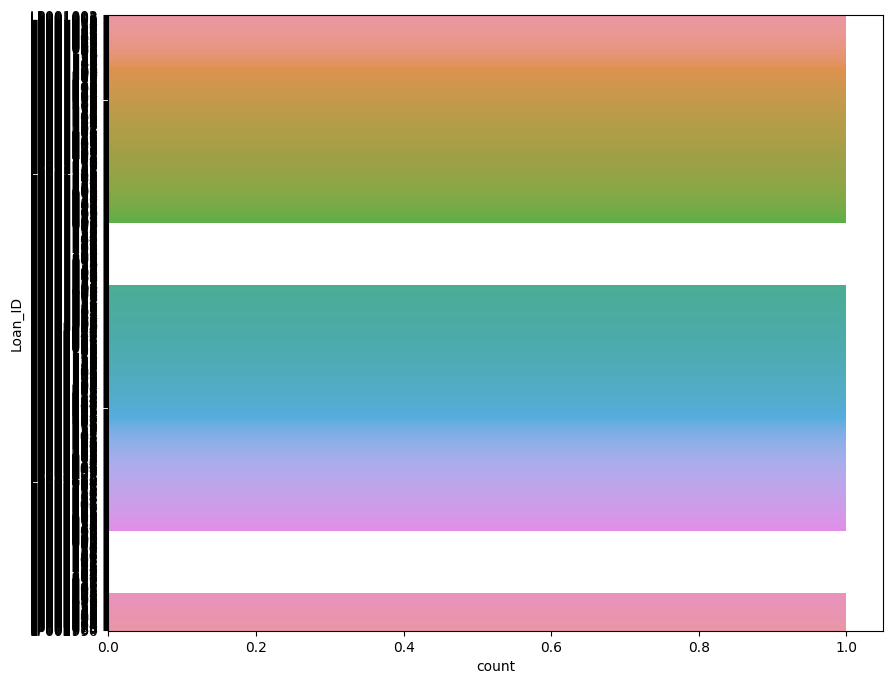

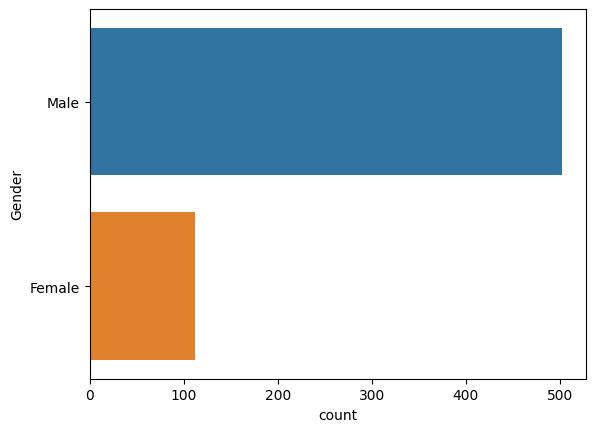

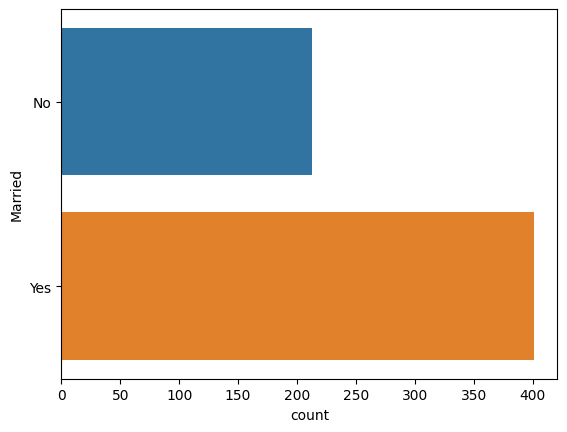

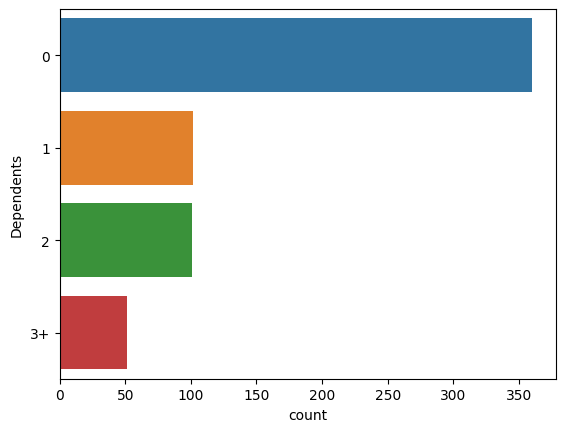

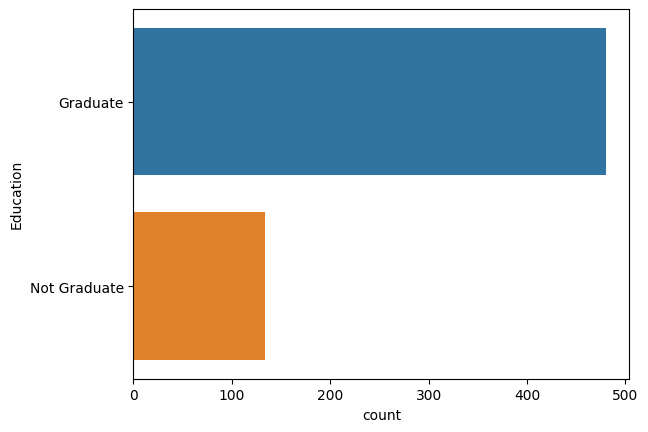

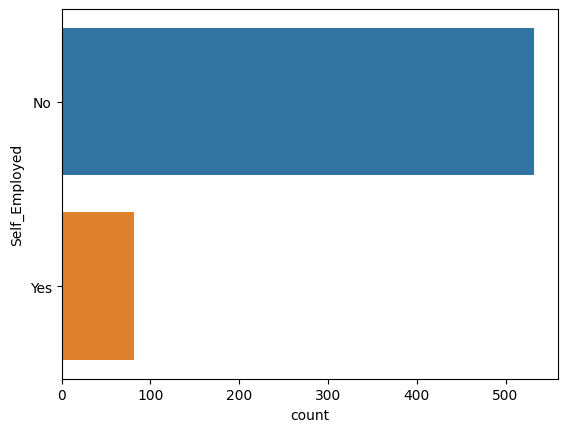

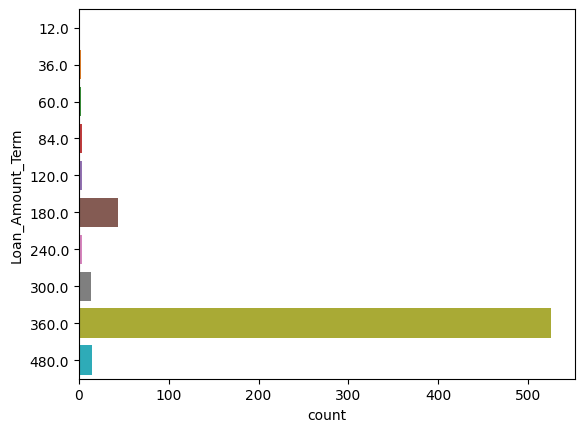

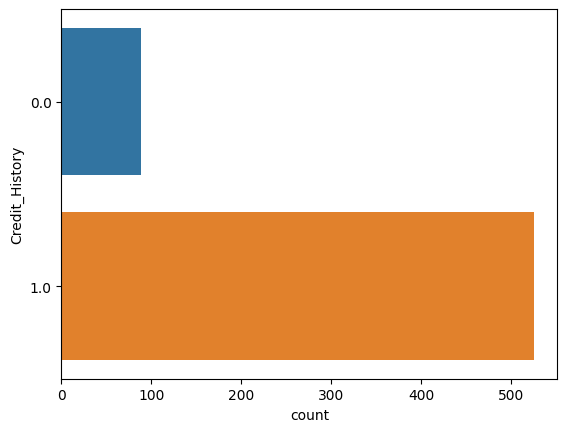

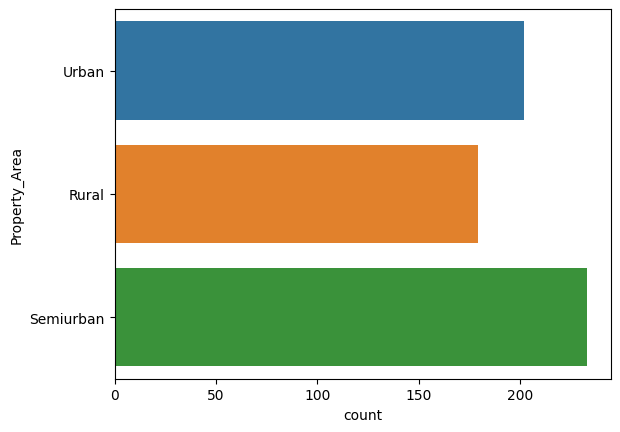

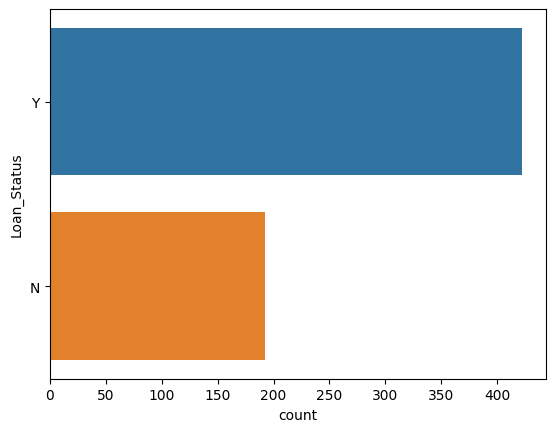

In [78]:
plt.figure(figsize = [10,8])
for col in cateorical_list:
    sns.countplot(data = data_train,y = col)
    plt.show();

**Observations**

- People who have taken previous loans are
reported maximum number of times.

- The highest count of records are from
 Semiurban properties.

- People who had previous credit history
are reported maximum number of times.

- Most of the loan applicants already have
a 360 months tenured loan ongoing.

- Most of loan applications are of
 salaried employees.

- Most of the applications are of graduates.

- Most of the applications have no dependencies.

- People who are married are applying more for the loan.

- The count for male applications are comparively higher than that of females.

## **Univariate Analysis (Numerical Features)**

In [79]:
data_train[data_train["CoapplicantIncome"] == 0.00000000e+00].index

Int64Index([  0,   2,   4,  15,  16,  17,  18,  20,  25,  28,
            ...
            595, 597, 598, 599, 602, 604, 609, 610, 612, 613],
           dtype='int64', length=273)

In [80]:
for index in data_train[data_train["CoapplicantIncome"] == 0.00000000e+00].index:
    data_train["CoapplicantIncome"][index] = np.mean(data_train["CoapplicantIncome"])

<ipython-input-80-05cdd2dfc7d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["CoapplicantIncome"][index] = np.mean(data_train["CoapplicantIncome"])


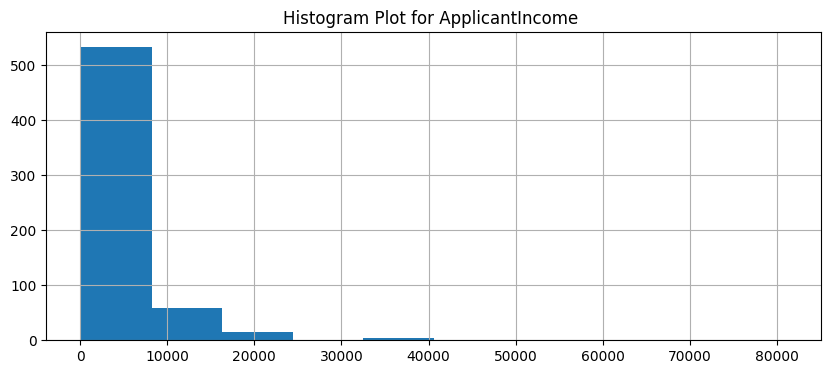

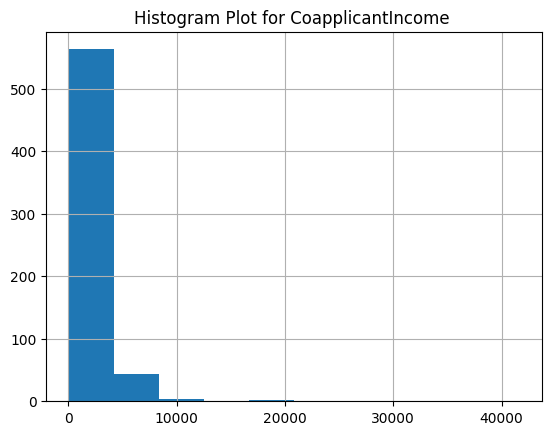

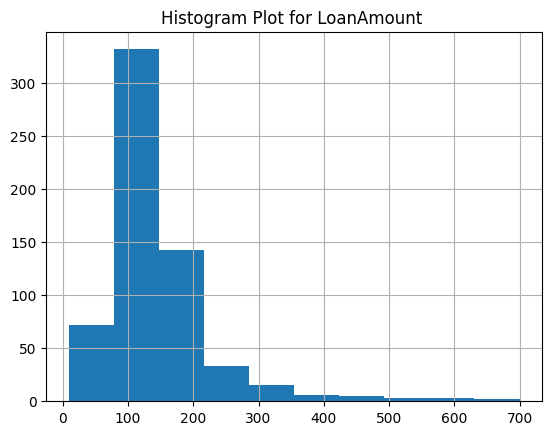

In [81]:
plt.figure(figsize = [10,4])
for col in numerical_list:
    plt.hist(data_train[col]);
    plt.grid();
    plt.title("Histogram Plot for {} ".format(col))
    plt.show();

**Observations:**

- All of the features they are having a right-skewed distribution.

- This means that these features are highly sensitive to outliers / noise data.

- Changing these features to log scale by using log trainsformation or using box-cox method may centralise the plots.

In [82]:
data_train["CoapplicantIncome"].values

array([1.62124580e+03, 1.50800000e+03, 1.62388626e+03, 2.35800000e+03,
       1.62653103e+03, 4.19600000e+03, 1.51600000e+03, 2.50400000e+03,
       1.52600000e+03, 1.09680000e+04, 7.00000000e+02, 1.84000000e+03,
       8.10600000e+03, 2.84000000e+03, 1.08600000e+03, 1.62918010e+03,
       1.63183349e+03, 1.63449120e+03, 1.63715324e+03, 3.50000000e+03,
       1.63981961e+03, 5.62500000e+03, 1.91100000e+03, 1.91700000e+03,
       2.92500000e+03, 1.64249033e+03, 2.25300000e+03, 1.04000000e+03,
       1.64516539e+03, 2.08300000e+03, 3.36900000e+03, 1.64784482e+03,
       1.65052860e+03, 1.66700000e+03, 3.00000000e+03, 2.06700000e+03,
       1.33000000e+03, 1.45900000e+03, 7.21000000e+03, 1.66800000e+03,
       1.65321676e+03, 1.21300000e+03, 1.65590929e+03, 2.33600000e+03,
       1.65860621e+03, 1.66130753e+03, 1.66401324e+03, 1.66672336e+03,
       3.44000000e+03, 2.27500000e+03, 1.64400000e+03, 1.66943789e+03,
       1.67215685e+03, 1.67488023e+03, 1.67760805e+03, 1.16700000e+03,
      

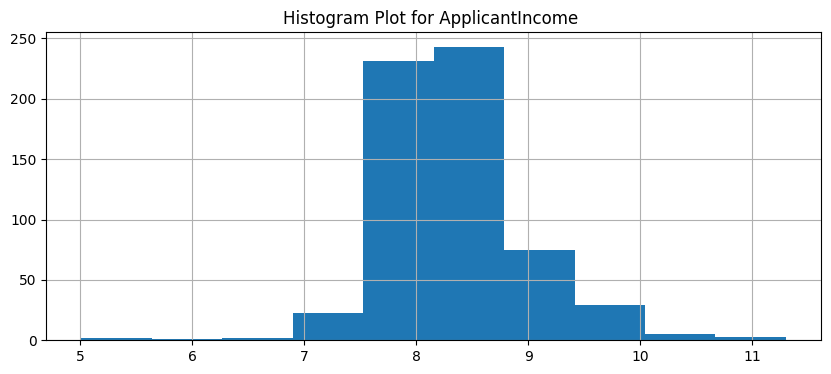

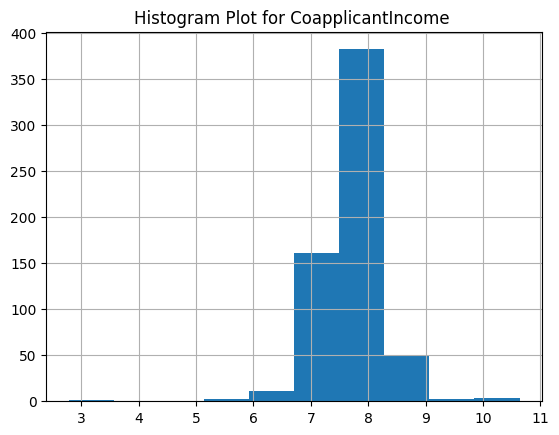

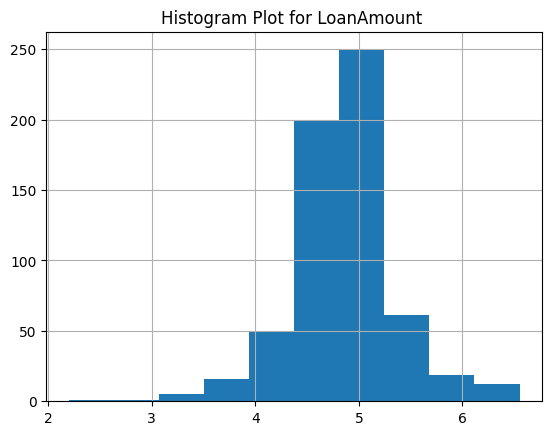

In [83]:
plt.figure(figsize = [10,4])
for col in numerical_list:
    plt.hist(np.log(data_train[col].values));
    plt.grid();
    plt.title("Histogram Plot for {} ".format(col))
    plt.show();

In [84]:
# making a dataframe in the log scale of the continious variables.
data_train_log = data_train.copy()
data_test_log = data_test.copy()

data_train_log[data_train_log["CoapplicantIncome"] == 0.00000000e+00].index
for index in data_train_log[data_train_log["CoapplicantIncome"] == 0.00000000e+00].index:
    data_train_log["CoapplicantIncome"][index] = np.mean(data_train_log["CoapplicantIncome"])

data_test_log[data_test_log["CoapplicantIncome"] == 0.00000000e+00].index
for index in data_test_log[data_test_log["CoapplicantIncome"] == 0.00000000e+00].index:
    data_test_log["CoapplicantIncome"][index] = np.mean(data_test_log["CoapplicantIncome"])

<ipython-input-84-a1f0658e59e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_log["CoapplicantIncome"][index] = np.mean(data_test_log["CoapplicantIncome"])


In [85]:
for col in numerical_list:
    data_train_log[col] = np.log(data_train_log[col])
    data_test_log[col] = np.log(data_test_log[col])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# **Bi-Variate Analysis**

In [86]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**How does Education impacts the loan status ?**

In [88]:
data_train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [90]:
data_train.groupby(["Education",'Loan_Status'])['Loan_Status'].count()

Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
Name: Loan_Status, dtype: int64

**How does Credit history impacts the loan status ?**

In [91]:
data_train.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N              110
                Y              415
Name: Loan_Status, dtype: int64

**What is the likelihood of getting a loan if someone has an education as well they have a previous credit history?**

In [92]:
data_train.groupby(["Education",'Credit_History','Loan_Status'])['Loan_Status'].count()

Education     Credit_History  Loan_Status
Graduate      0.0             N               57
                              Y                6
              1.0             N               83
                              Y              334
Not Graduate  0.0             N               25
                              Y                1
              1.0             N               27
                              Y               81
Name: Loan_Status, dtype: int64

**Observations :**

- Amongst the graduates there are 340 people who are eligable for loan.
- People who are not graduate amongst them 82 people are eligable for a loan.
- The majority who dont have a previous credit history are not getting loans however, there are 7 people who have recieved the loan.
- If someone has a previous credit score then there lies an almost 80% chance that they will get a loan.
- If one is a graduate and has an active credit history in that case the chance of getting a loan is around 54%

**What is the chance of getting a loan given that the person is self-employed and has a previous history of credit?**

In [93]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [94]:
data_train.groupby([ 'Self_Employed' ,  'Credit_History' , 'Loan_Status'])['Loan_Status'].count()

Self_Employed  Credit_History  Loan_Status
No             0.0             N               70
                               Y                7
               1.0             N               96
                               Y              359
Yes            0.0             N               12
               1.0             N               14
                               Y               56
Name: Loan_Status, dtype: int64

<Axes: xlabel='count', ylabel='Self_Employed'>

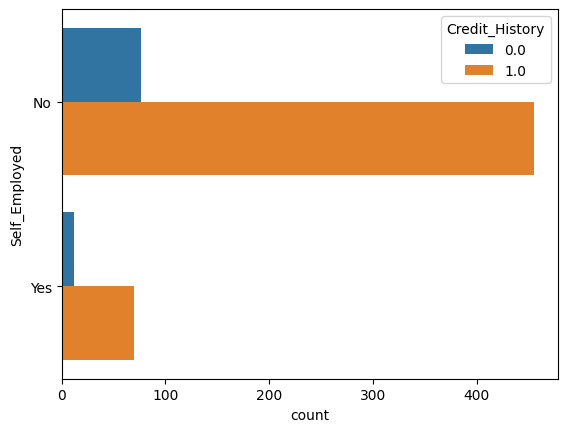

In [95]:
sns.countplot(data = data_train, y = "Self_Employed", hue = "Credit_History")

**Observations**

- If a person is not self employed i.e, the person is salaried and has a history of credit already then the person is likely\
to have a greater chance of getting a loan.

- On the other hand If a person is not self employed i.e, the person is salaried in that case if he/she does'nt have an history of credit then, the likelihood of getting a loan is least.i.e, nearly 1.15%

**What insights can be formed from the teniority of the loan and its average loan amount?**

In [97]:
data_train['LoanAmount'].dtypes

dtype('float64')

In [96]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

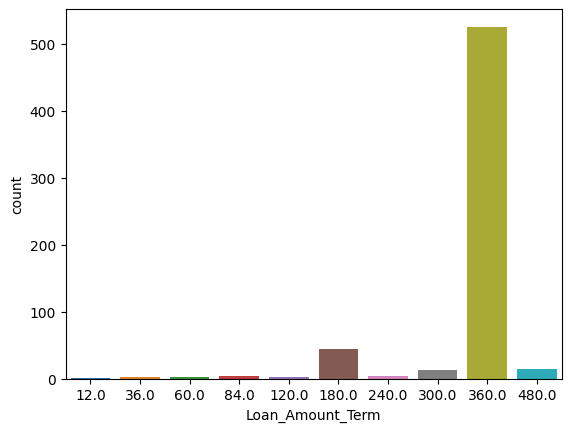

In [99]:
sns.countplot(data= data_train,
             x = 'Loan_Amount_Term')

<Axes: xlabel='LoanAmount', ylabel='Count'>

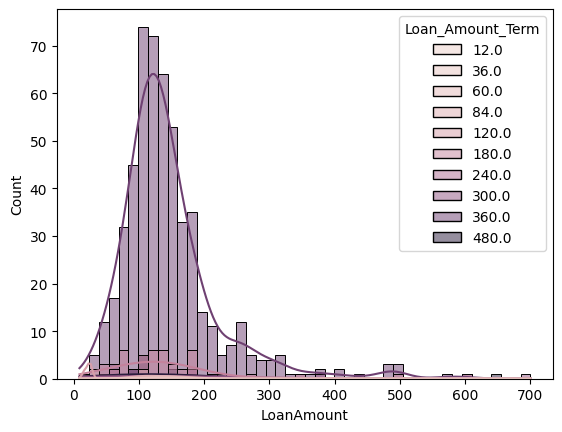

In [101]:
sns.histplot(data= data_train,
             x = "LoanAmount",
             hue = 'Loan_Amount_Term',
             kde = True)

<ipython-input-102-aeb1a787ae2e>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data= data_train,


<Axes: xlabel='LoanAmount', ylabel='Density'>

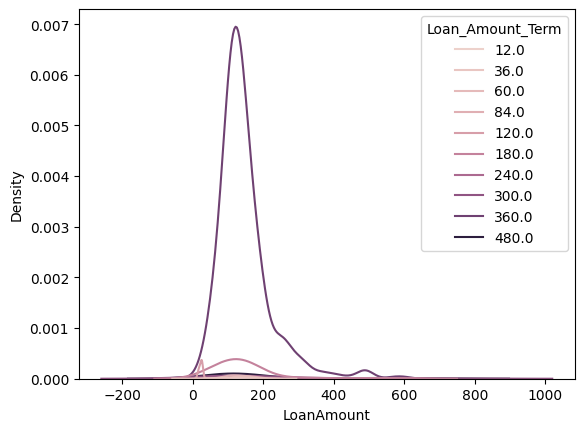

In [102]:
sns.kdeplot(data= data_train,
             x = "LoanAmount",
             hue = 'Loan_Amount_Term')

In [118]:
data_train.groupby(['Loan_Amount_Term'])["LoanAmount"].agg([np.mean,np.median])
# data.groupby(by='State')['Sales'].agg([np.mean,np.median])

,mean,median
Loan_Amount_Term,,
12.0,111.000000,111.000000
36.0,117.500000,117.500000
60.0,140.000000,140.000000
84.0,132.250000,126.000000
120.0,22.333333,25.000000
180.0,147.473280,127.000000
240.0,125.353041,123.206081
300.0,185.153846,124.000000
360.0,146.389413,130.000000


In [120]:
data_grouped_by_term_avg_loan_amount =data_train.groupby(['Loan_Amount_Term'])["LoanAmount"].agg([np.mean])

In [121]:
data_grouped_by_term_avg_loan_amount.index

Float64Index([12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0,
              480.0],
             dtype='float64', name='Loan_Amount_Term')

In [127]:
data_grouped_by_term_avg_loan_amount.values

array([[111.        ],
       [117.5       ],
       [140.        ],
       [132.25      ],
       [ 22.33333333],
       [147.4732801 ],
       [125.35304054],
       [185.15384615],
       [146.3894127 ],
       [151.8       ]])

In [136]:
index = []
for i in data_grouped_by_term_avg_loan_amount.index:
    print(i)
    index.append(i)
    # for j in i :
    #     print(j)

12.0
36.0
60.0
84.0
120.0
180.0
240.0
300.0
360.0
480.0


In [137]:
values = []
for i in data_grouped_by_term_avg_loan_amount.values:
    # print(i)
    for j in i :
        print(j)
        values.append(j)

111.0
117.5
140.0
132.25
22.333333333333332
147.4732800982801
125.35304054054055
185.15384615384616
146.38941270167507
151.8


Text(0, 0.5, 'Average loan term amount')

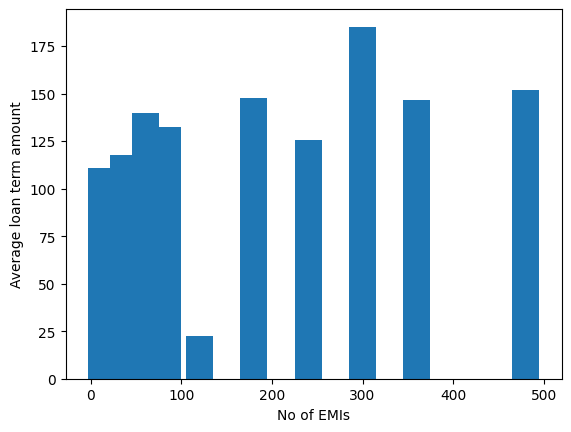

In [146]:
plt.bar(index,values, width = 30)
plt.xlabel("No of EMIs")
plt.ylabel("Average loan term amount")

**How does the Applicant Income impact the LoanAmount ?**

In [149]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

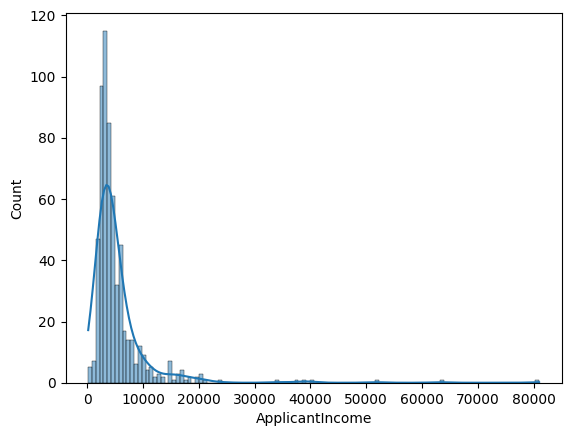

In [150]:
sns.histplot(data = data_train,
             x = "ApplicantIncome",
             kde= True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

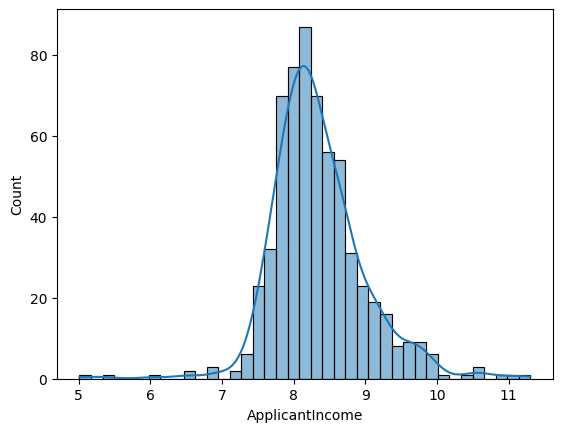

In [151]:
sns.histplot(data = data_train_log,
             x = "ApplicantIncome",
             kde= True)

In [152]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [155]:
data_train["LoanAmount"]

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

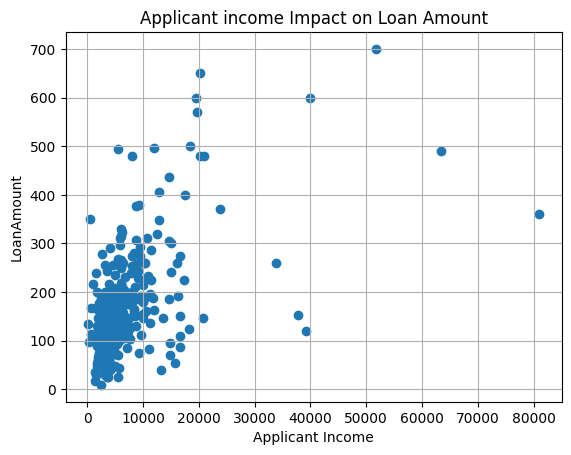

In [154]:
plt.scatter(data_train['ApplicantIncome'],
            data_train['LoanAmount'])
plt.xlabel("Applicant Income")
plt.ylabel("LoanAmount")
plt.grid();
plt.title("Applicant income Impact on Loan Amount");
plt.show();

**Observation:**

- People with a low income range seek to take a greater loan.
The number of persons in this range is way higher than people who are making a greater amount of paycheck.

**Average income of people who are taking a greater loan ?**

In [157]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [158]:
data_train.groupby(by='Loan_Amount_Term')['ApplicantIncome'].agg([np.mean,np.median])

,mean,median
Loan_Amount_Term,,
12.0,4625.000000,4625.0
36.0,3419.500000,3419.5
60.0,5032.500000,5032.5
84.0,4128.500000,3804.5
120.0,2792.666667,3459.0
180.0,6927.886364,3836.0
240.0,5907.750000,4994.0
300.0,8184.923077,3500.0
360.0,5267.028517,3848.0
